<a href="https://colab.research.google.com/github/haiyen0607/BTVN-W11/blob/main/BTVN_W11_22010300_L%C3%AA_H%E1%BA%A3i_Y%E1%BA%BFn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIRBASE**

```markdown
Link data: https://raw.githubusercontent.com/thieu1995/csv-files/main/data/airbase_data.csv
```

``` markdown
Chọn ra 1 cột timeseries là: BETR801, xây dựng mô hình dự đoán dùng AR, MA, ARMA và ARIMA models.
```






## **Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as datetime
import sklearn
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
sns.set()
pd.options.display.max_rows = 8

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split


## **Tiền xử lí dữ liệu**

###***Đọc dữ liệu***

In [ ]:
path = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/airbase_data.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,Unnamed: 0,BETR801,BETN029,FR04037,FR04012
0,1998-01-01 00:00:00,NaN,16.0,NaN,NaN
1,1998-01-01 01:00:00,NaN,13.0,NaN,NaN
2,1998-01-01 02:00:00,NaN,12.0,NaN,NaN
3,1998-01-01 03:00:00,NaN,12.0,NaN,NaN
4,1998-01-01 04:00:00,NaN,11.0,NaN,NaN


In [ ]:
data.shape

(131265, 5)

In [ ]:
data.describe()

,BETR801,BETN029,FR04037,FR04012
count,113252.000000,119703.000000,120384.000000,119448.000000
mean,47.049302,16.542171,40.040005,87.993261
std,21.733629,12.446040,23.024347,41.317684
min,1.000000,1.000000,0.000000,0.000000
25%,31.000000,7.000000,23.000000,61.000000
50%,45.000000,12.000000,37.000000,88.000000
75%,60.000000,23.000000,54.000000,115.000000
max,339.000000,105.000000,256.000000,358.000000


In [ ]:
data.isna().sum()

Unnamed: 0        0
BETR801       18013
BETN029       11562
FR04037       10881
FR04012       11817
dtype: int64

###***Đổi tên cột thời gian để dễ thao tác***

In [ ]:
data.rename(columns = {'Unnamed: 0':'date'}, inplace = True)

In [ ]:
data.head()

,date,BETR801,BETN029,FR04037,FR04012
0,1998-01-01 00:00:00,NaN,16.0,NaN,NaN
1,1998-01-01 01:00:00,NaN,13.0,NaN,NaN
2,1998-01-01 02:00:00,NaN,12.0,NaN,NaN
3,1998-01-01 03:00:00,NaN,12.0,NaN,NaN
4,1998-01-01 04:00:00,NaN,11.0,NaN,NaN


###***Kiểm Tra và chỉnh sửa giá trị còn trống***

In [ ]:
data.isna()

,date,BETR801,BETN029,FR04037,FR04012
0,False,True,False,True,True
1,False,True,False,True,True
2,False,True,False,True,True
3,False,True,False,True,True
...,...,...,...,...,...
131261,False,False,False,False,False
131262,False,False,False,False,False
131263,False,False,False,False,False
131264,False,False,False,False,False


In [ ]:
data.isna().sum()

date           0
BETR801    18013
BETN029    11562
FR04037    10881
FR04012    11817
dtype: int64

<Axes: title={'center': 'Missing values'}, ylabel='percentage'>

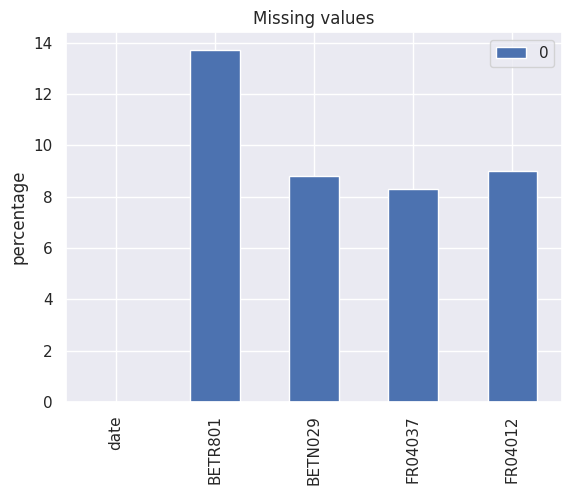

In [ ]:
miss_vals = pd.DataFrame(data.isnull().sum() / len(data) * 100)
miss_vals.plot(kind = 'bar', title = 'Missing values', ylabel = 'percentage')

In [ ]:
data = data.fillna(method = "bfill")
data.isna().sum()

date       0
BETR801    0
BETN029    0
FR04037    0
FR04012    0
dtype: int64

In [ ]:
data.head()

,date,BETR801,BETN029,FR04037,FR04012
0,1998-01-01 00:00:00,34.0,16.0,68.0,105.0
1,1998-01-01 01:00:00,34.0,13.0,68.0,105.0
2,1998-01-01 02:00:00,34.0,12.0,68.0,105.0
3,1998-01-01 03:00:00,34.0,12.0,68.0,105.0
4,1998-01-01 04:00:00,34.0,11.0,68.0,105.0


In [ ]:
data.tail()

,date,BETR801,BETN029,FR04037,FR04012
131260,2012-12-31 19:00:00,21.0,2.5,28.0,67.0
131261,2012-12-31 20:00:00,16.5,2.0,16.0,47.0
131262,2012-12-31 21:00:00,14.5,2.5,13.0,43.0
131263,2012-12-31 22:00:00,16.5,3.5,14.0,42.0
131264,2012-12-31 23:00:00,15.0,3.0,13.0,49.0


###***Vẽ đồ thị***

<Axes: >

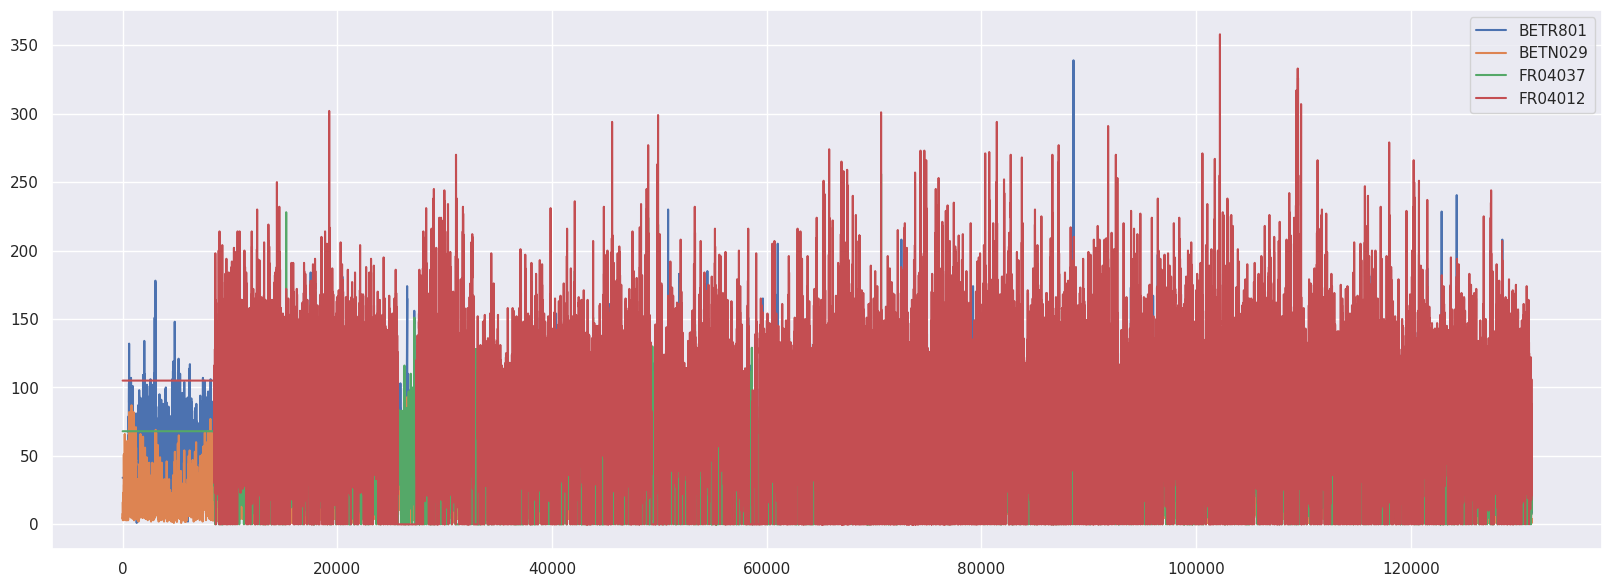

In [ ]:
data.plot(figsize = (20,7))

<Axes: >

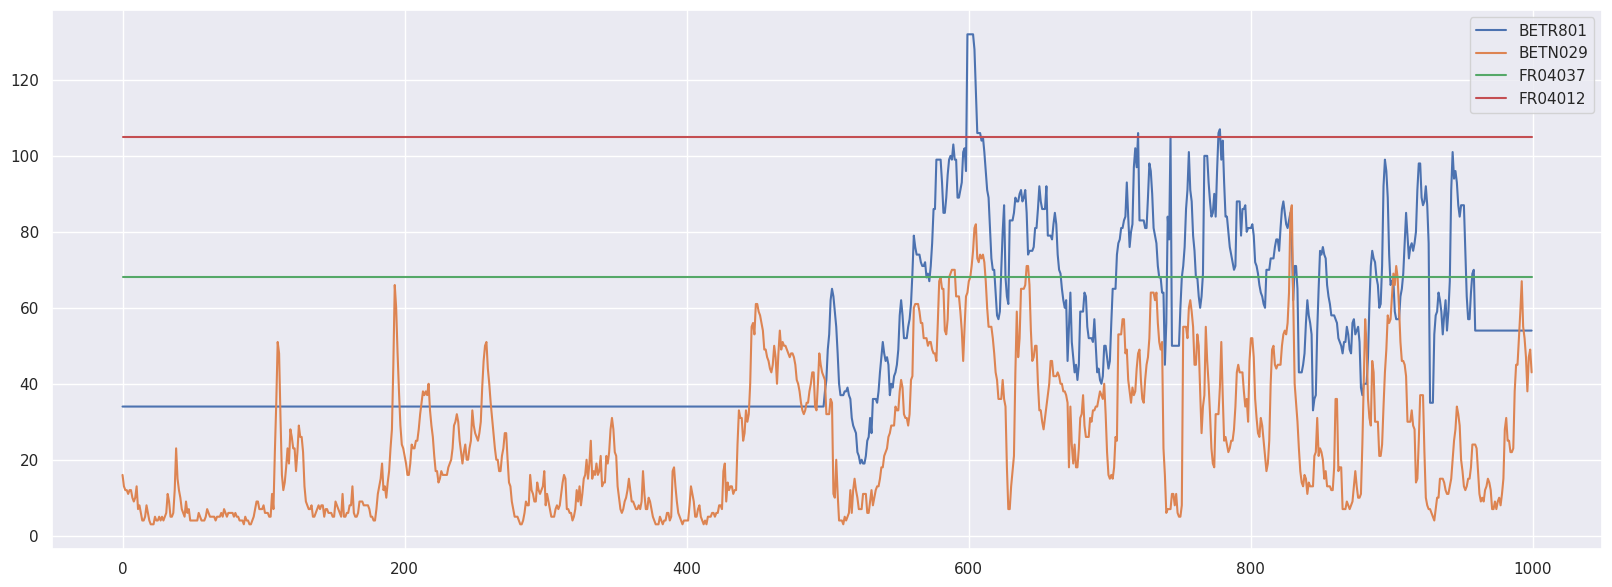

In [ ]:
# chọn 1000 dữ liệu cũ nhất
data[:1000].plot(figsize = (20,7))

<Axes: >

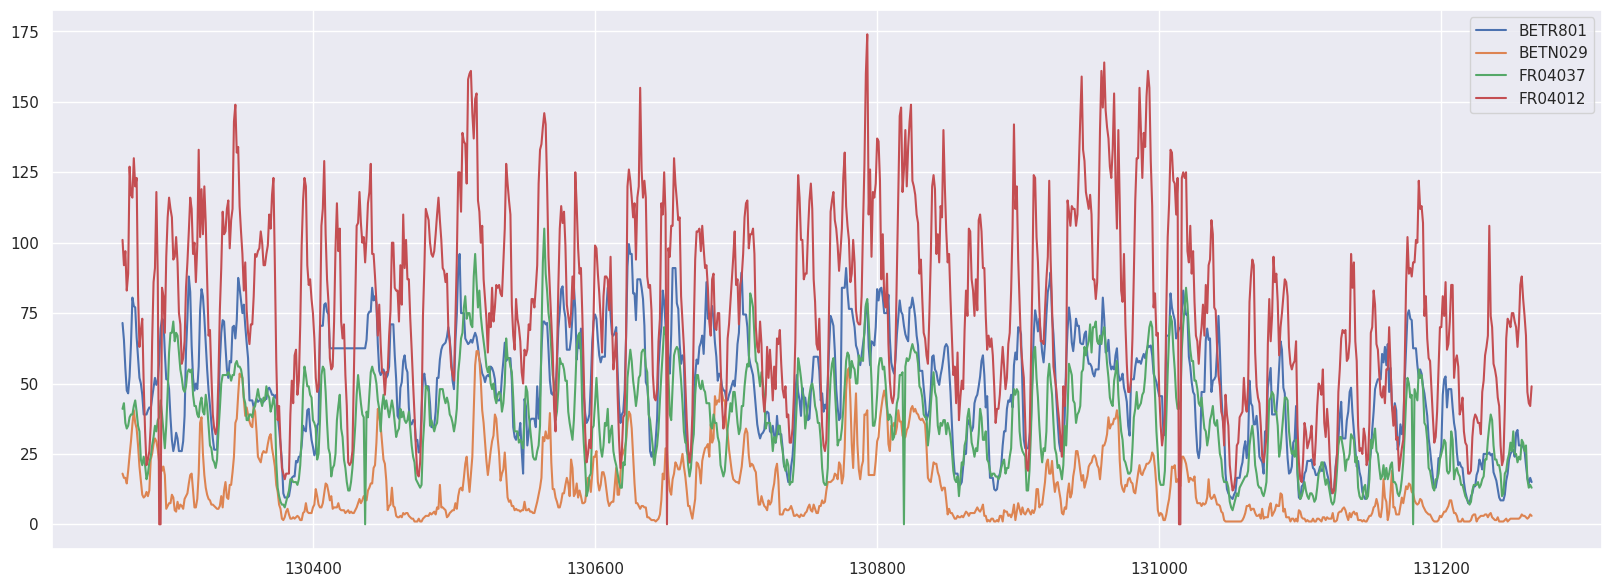

In [ ]:
# chọn 1000 dữ liệu mới nhất
data[-1000:].plot(figsize = (20,7))

##**Chọn ra cột timeseries để thao tác: BETR801**

In [ ]:
data_set = data.iloc[:,:2]

In [ ]:
data_set

,date,BETR801
0,1998-01-01 00:00:00,34.0
1,1998-01-01 01:00:00,34.0
2,1998-01-01 02:00:00,34.0
3,1998-01-01 03:00:00,34.0
...,...,...
131261,2012-12-31 20:00:00,16.5
131262,2012-12-31 21:00:00,14.5
131263,2012-12-31 22:00:00,16.5
131264,2012-12-31 23:00:00,15.0


###***Chuyển đổi index thành datetime***


In [ ]:
data_set.date = pd.to_datetime(data_set.date, dayfirst = True)
data_set.set_index("date", inplace = True)
data_set

,BETR801
date,
1998-01-01 00:00:00,34.0
1998-01-01 01:00:00,34.0
1998-01-01 02:00:00,34.0
1998-01-01 03:00:00,34.0
...,...
2012-12-31 20:00:00,16.5
2012-12-31 21:00:00,14.5
2012-12-31 22:00:00,16.5
2012-12-31 23:00:00,15.0


###***Vẽ đồ thị của BETR908***

Text(0, 0.5, 'BETR801')

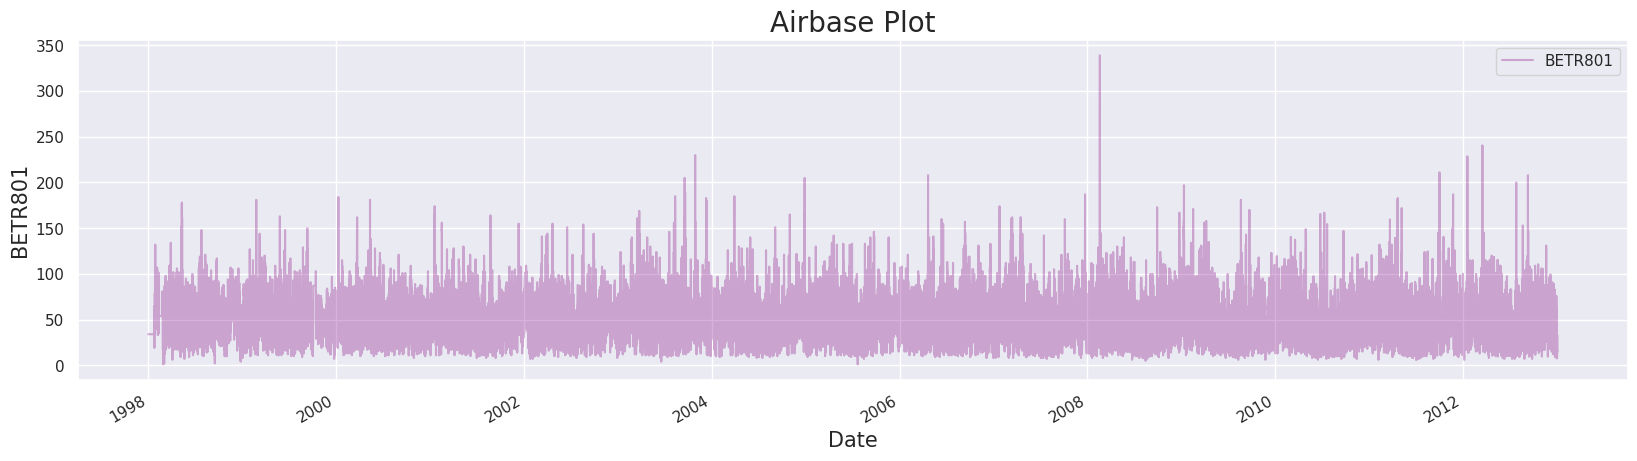

In [ ]:
data_set.plot(figsize = (20,5), color = 'purple', alpha = 0.3)
plt.title("Airbase Plot", size = 20)
plt.xlabel("Date", size = 15)
plt.ylabel("BETR801", size = 15)

###***Chuẩn hóa dữ liệu***

In [ ]:
avg, dev = data_set.mean(), data_set.std()

In [ ]:
data_set = (data_set - avg) / dev

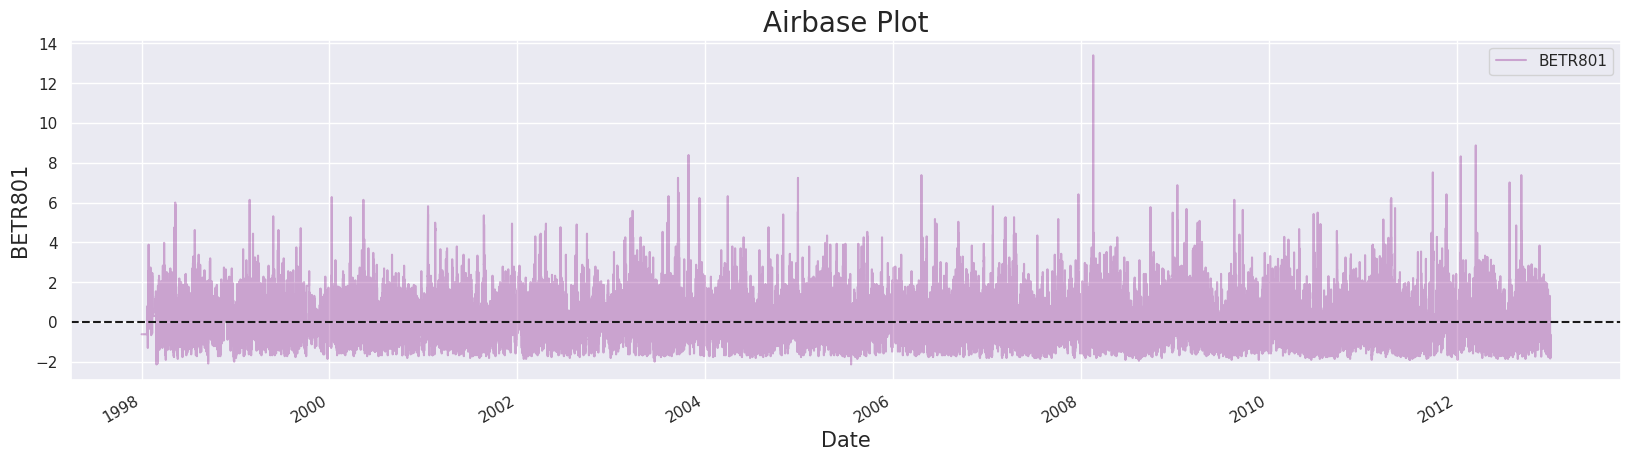

In [ ]:
data_set.plot(figsize = (20,5), color = 'purple', alpha = 0.3)
plt.title("Airbase Plot", size = 20)
plt.xlabel("Date", size = 15)
plt.ylabel("BETR801", size = 15)
plt.axhline(0, linestyle='--', color='k', alpha=1)

###***Kiểm tra và loại bỏ tính dừng***

In [ ]:
def perform_adf_test(series):
    result = adfuller(series)
    print('adf Statistic: %f'% result[0])
    print('p-value: %f'% result[1])

In [ ]:
perform_adf_test(data_set)

adf Statistic: -29.590735
p-value: 0.000000


In [ ]:
data_set = data_set.diff().dropna()

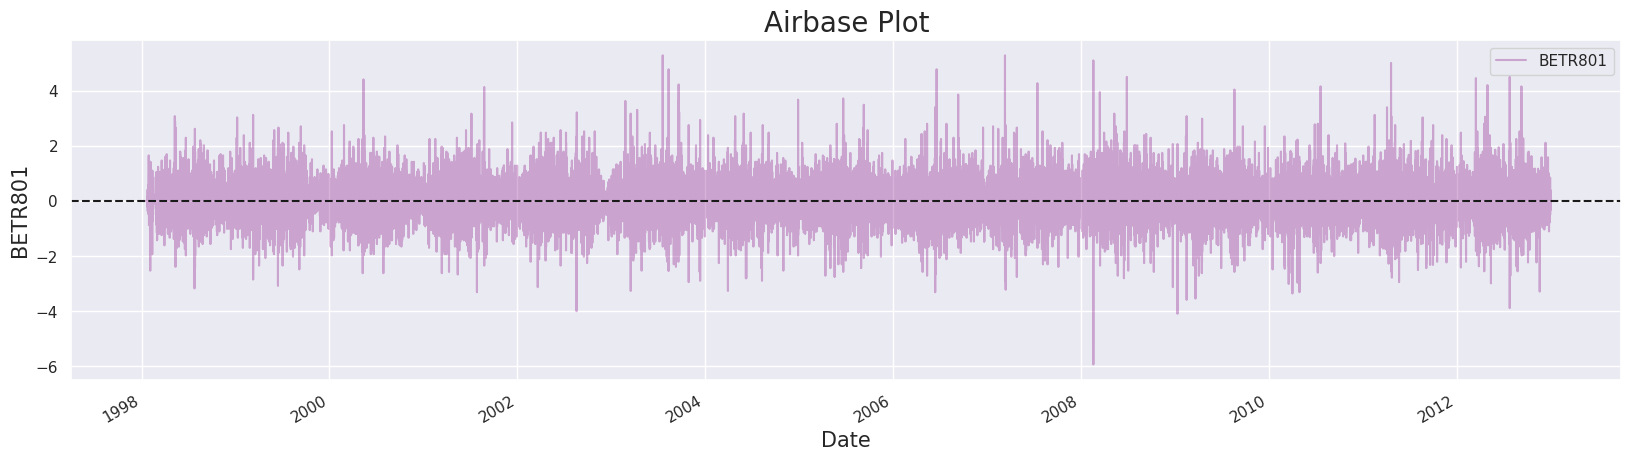

In [ ]:
data_set.plot(figsize = (20,5), color = 'purple', alpha = 0.3)
plt.title("Airbase Plot", size = 20)
plt.xlabel("Date", size = 15)
plt.ylabel("BETR801", size = 15)
plt.axhline(0, linestyle='--', color='k', alpha=1)

###***Tách dữ liệu***

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data_set = data_set.asfreq('b')
data_set = data_set.fillna(method = 'ffill')

In [ ]:
data_set['market_value'] = data_set.BETR801

In [ ]:
size = int(len(data_set)*0.8)
df, df_test = data_set.iloc[:size], data_set.iloc[size:]

###***Kiểm tra Seasonality***

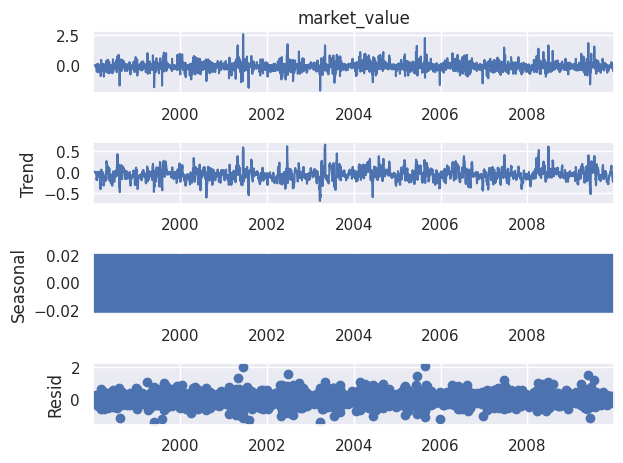

In [ ]:
s_dec_additive = seasonal_decompose(df.market_value, model = 'additive')
s_dec_additive.plot()
plt.show()

###***Vẽ đồ thị train***

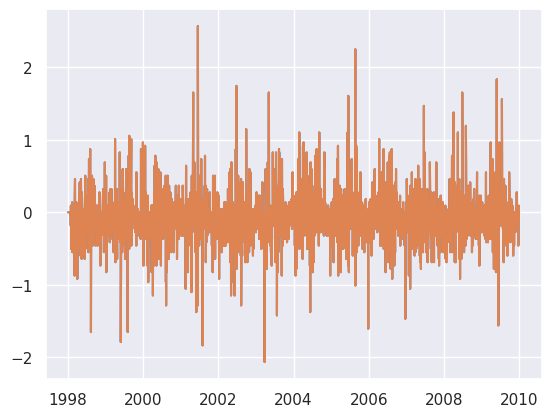

In [ ]:
plt.plot(df)

###**AR MODEL**

(-0.06, 0.05)

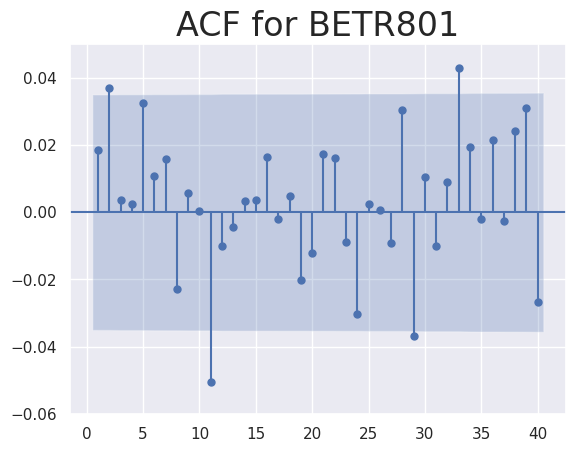

In [ ]:
# the ACF

sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title('ACF for BETR801', size = 24)
plt.ylim(-0.06, 0.05)

(-0.08, 0.06)

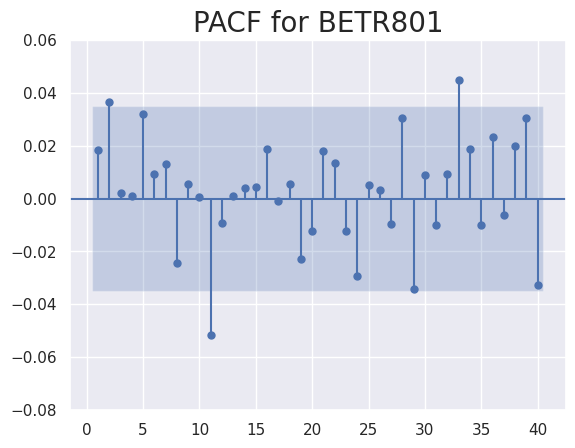

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title('PACF for BETR801', size = 20)
plt.ylim(-0.08, 0.06)

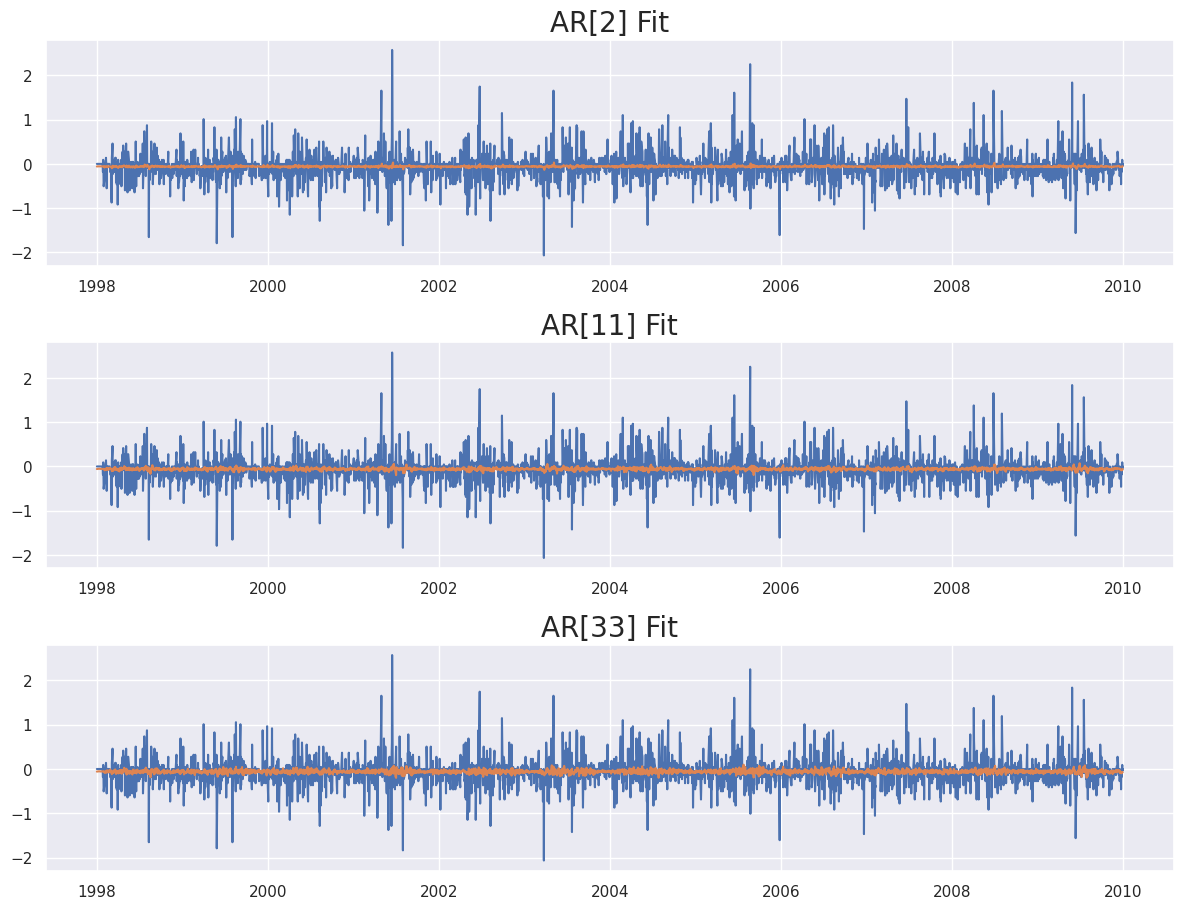

In [ ]:
# theo PACF có 3 mô hình cần chú ý: AR(2) , AR(11) và AR(33)
plt.figure(figsize = (12,12))
ar_orders = [2,11,33]
fitted_model_dict = {}
for idx, ar_order in enumerate(ar_orders):
    ar_model = ARIMA(df.market_value, order = (ar_order, 0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(df.market_value)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR[%s] Fit'%ar_order, fontsize = 20)
    
plt.tight_layout()

```markdown
# Vì khó xác định được bằng đồ thị nên dự đoán bằng AIC và BIC
```

####***Xác định bằng AIC và BIC***

In [ ]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(2): 1480.254385908695
AIC for AR(11): 1483.8376851603377
AIC for AR(33): 1505.4858759975405


In [ ]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s' %(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(2): 1504.4495390428317
BIC for AR(11): 1562.4719328462822
BIC for AR(33): 1717.1934659212375


```markdown
#Theo AIC và BIC thì mô hình AR(2) là hợp lý nhất
```

###**MA MODEL**

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
model = ARIMA(df.market_value, order = (0,0,33))

In [ ]:
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 3130
Model:                ARIMA(0, 0, 33)   Log Likelihood                -717.538
Date:                Tue, 02 May 2023   AIC                           1505.077
Time:                        14:32:08   BIC                           1716.784
Sample:                    01-01-1998   HQIC                          1581.063
                         - 12-30-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0588      0.006     -9.631      0.000      -0.071      -0.047
ma.L1          0.0181      0.015      1.173      0.241      -0.012       0.048
ma.L2          0.0376      0.018      2.094      0.0

```markdown
#theo bảng trên ta thấy MA(2), MA(11), MA(29), MA(33) là 3 mô hình phù hợp, nhưng phù hợp nhất là MA(11) vì p = 0.0000
```

###ARMA Model & ARIMA Model

In [ ]:
model2 = ARIMA(df.market_value, order = (2,11,11))

In [ ]:
model2_fit = model2.fit()
print(model2_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 3130
Model:               ARIMA(2, 11, 11)   Log Likelihood               -8405.099
Date:                Tue, 02 May 2023   AIC                          16838.198
Time:                        14:33:40   BIC                          16922.832
Sample:                    01-01-1998   HQIC                         16868.580
                         - 12-30-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9433      0.011   -184.602      0.000      -1.964      -1.923
ar.L2         -0.9880      0.011    -93.724      0.000      -1.009      -0.967
ma.L1         -5.9642      0.004  -1580.413      0.0

In [ ]:
#get prediction start and end dates
pred_start_date = df.market_value.index[0]
pred_end_date = df.market_value.index[-1]


In [ ]:
#get the predictions and residuals
predictions = model_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = df.market_value - predictions

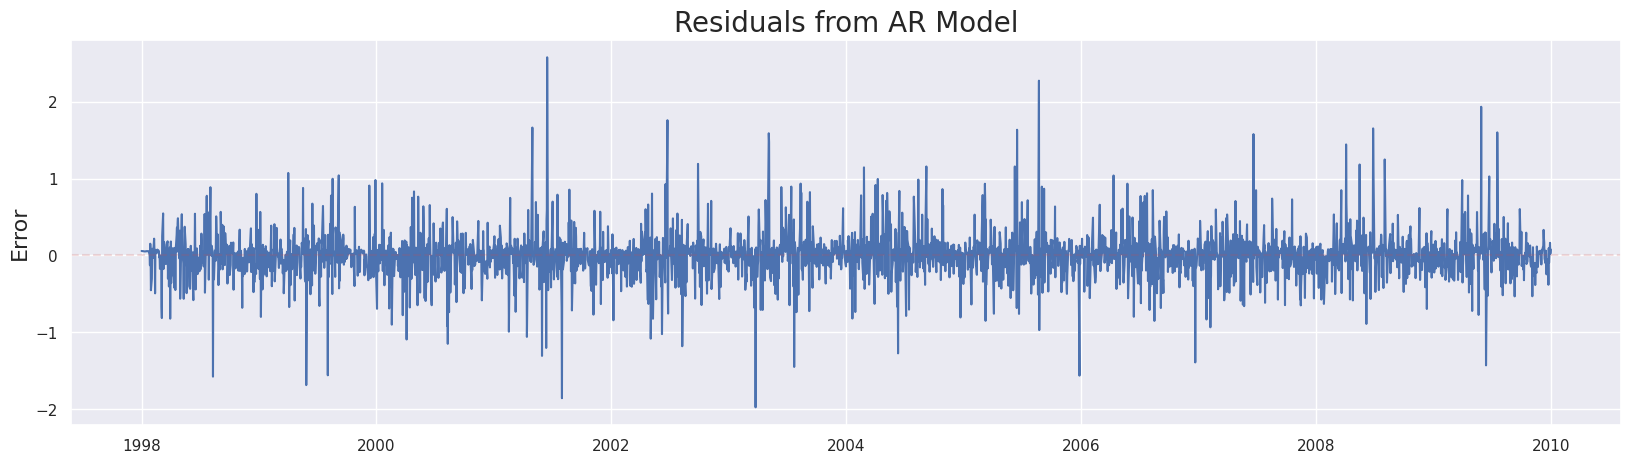

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(residuals)
plt.title("Residuals from AR Model", size = 20)
plt.ylabel('Error', size = 16)
plt.axhline(0, color = 'r', linestyle = '--', alpha = 0.2)

Text(0, 0.5, 'AIR')

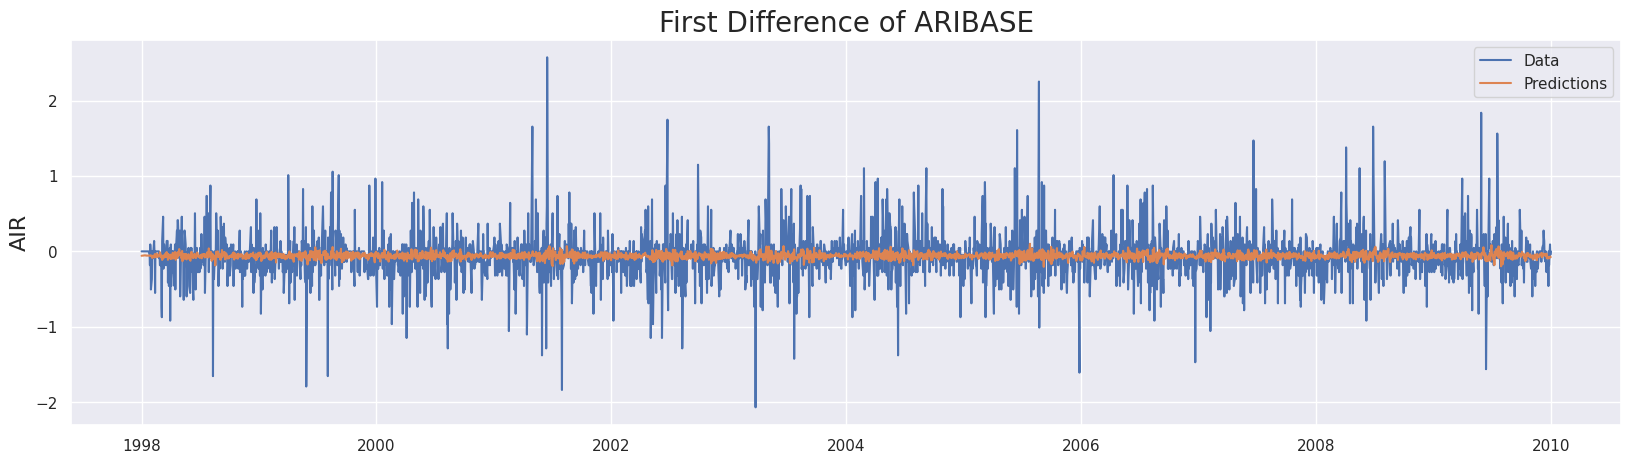

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(df.market_value)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('First Difference of ARIBASE', size = 20)
plt.ylabel('AIR', size = 16)

##**RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from math import sqrt
mse = mean_squared_error(residuals, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.312020


Test RMSE: 0.312


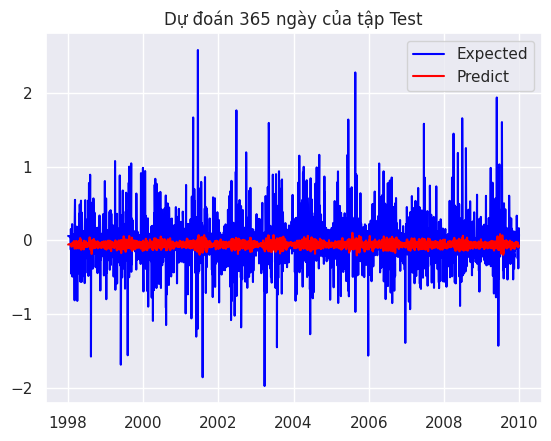

In [ ]:
rmse = sqrt(mean_squared_error(residuals, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(residuals, color='blue', label='Expected')
plt.plot(predictions, color='red', label='Predict')
plt.legend()
plt.title('Dự đoán 365 ngày của tập Test')
plt.show()